LASSO - LES simulations with different Large-Scale forcing scales for 4th April 2019 over SGP


In [62]:
# Libraries required for this tutorial...

# import dask
from datetime import datetime
import numpy as np
import xarray as xr
import xwrf

import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
# Plotting wrfstat variables...
from distributed import Client
client = Client("tcp://127.0.0.1:41521")
path_shcu_root = "/data/project/ARM_Summer_School_2024_Data/lasso_tutorial/ShCu/untar"  # on Jupyter

case_date = datetime(2019, 4, 4)
sim_id = [6,7,8]

In [63]:
ds_stat_1 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id[0]:04d}/raw_model/wrfstat_d01_{case_date:%Y-%m-%d_12:00:00}.nc")
ds_stat_2 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id[1]:04d}/raw_model/wrfstat_d01_{case_date:%Y-%m-%d_12:00:00}.nc")
ds_stat_3 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id[2]:04d}/raw_model/wrfstat_d01_{case_date:%Y-%m-%d_12:00:00}.nc")
ds_stat_1 = ds_stat_1.assign_coords(height=(ds_stat_1["CSP_Z"]))
ds_stat_2 = ds_stat_2.assign_coords(height=(ds_stat_2["CSP_Z"]))
ds_stat_3 = ds_stat_3.assign_coords(height=(ds_stat_3["CSP_Z"]))
ds_stat_3["Time"] = ds_stat_3["XTIME"]
ds_stat_2["Time"] = ds_stat_2["XTIME"]
ds_stat_1["Time"] = ds_stat_1["XTIME"]

# Note the extra details required by open_mfdataset to connect the files together in time.
ds_xwrf_1 = xr.open_mfdataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id[0]:04d}/raw_model/wrfout_d01_*.nc", combine="nested", concat_dim="Time").xwrf.postprocess()
ds_xwrf_2 = xr.open_mfdataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id[1]:04d}/raw_model/wrfout_d01_*.nc", combine="nested", concat_dim="Time").xwrf.postprocess()
ds_xwrf_3 = xr.open_mfdataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id[2]:04d}/raw_model/wrfout_d01_*.nc", combine="nested", concat_dim="Time").xwrf.postprocess()
ds_xwrf_3["Time"] = ds_xwrf_3["XTIME"]
ds_xwrf_2["Time"] = ds_xwrf_2["XTIME"]
ds_xwrf_1["Time"] = ds_xwrf_1["XTIME"]

Advection Input to LES simulations with different forcings scale and corresponding LES output thermodynamic and Cloud time-height profiles 

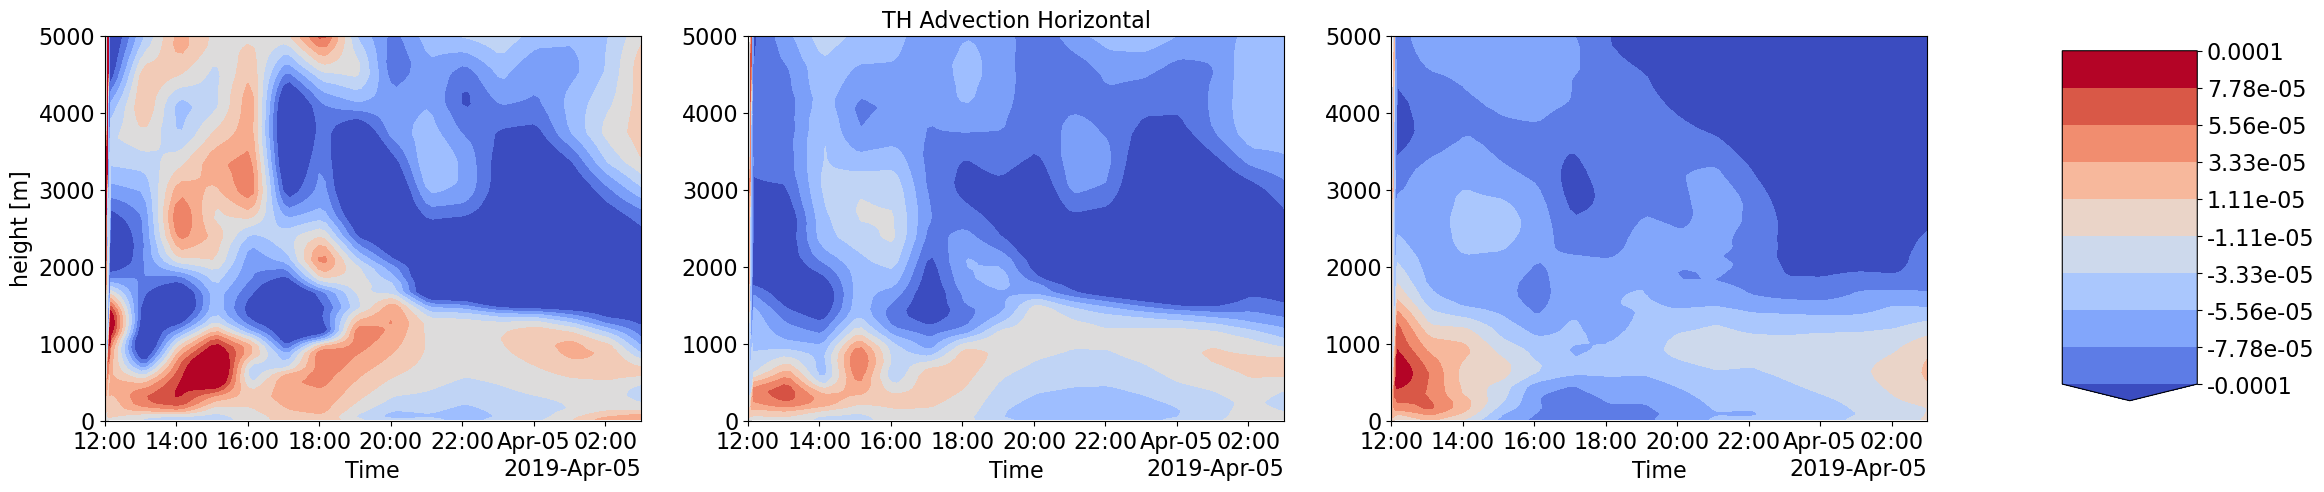

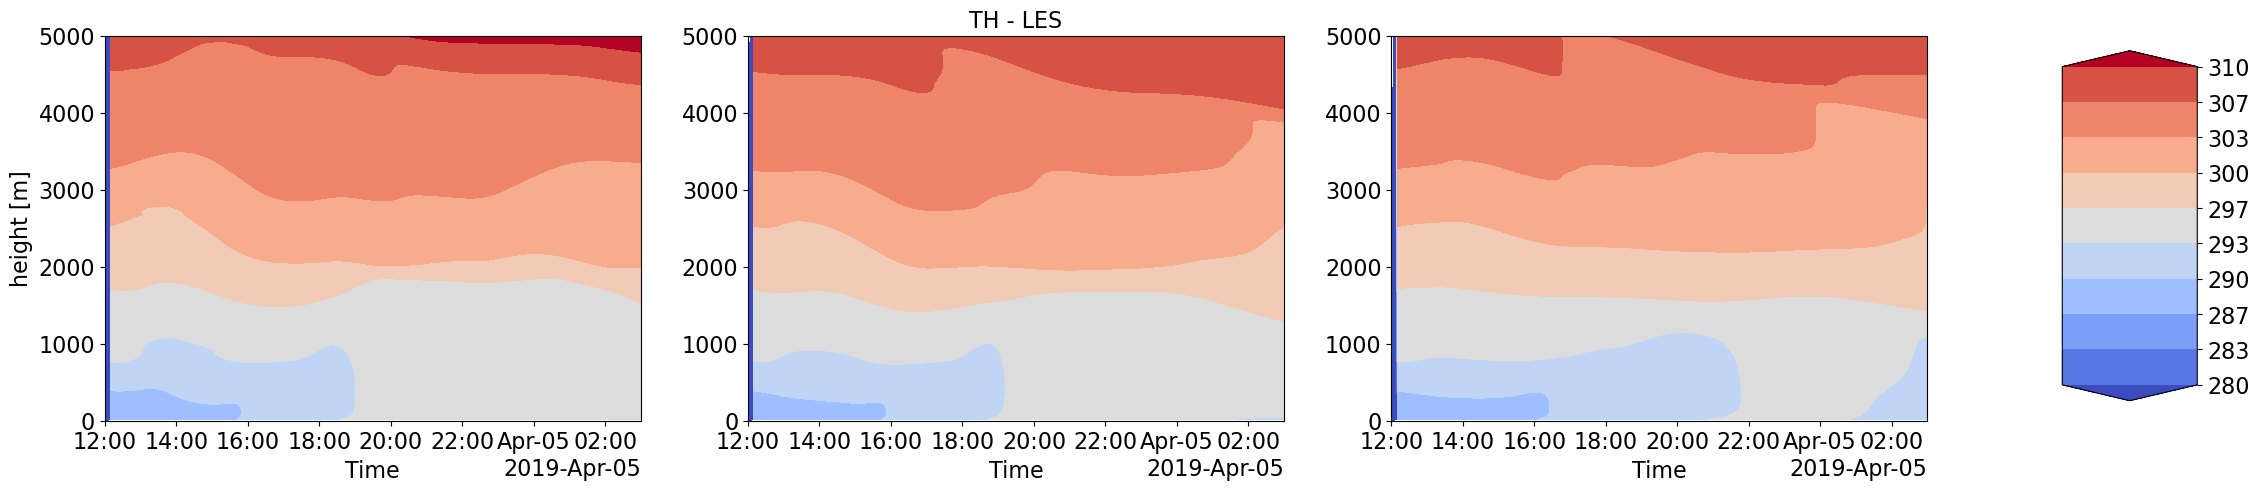

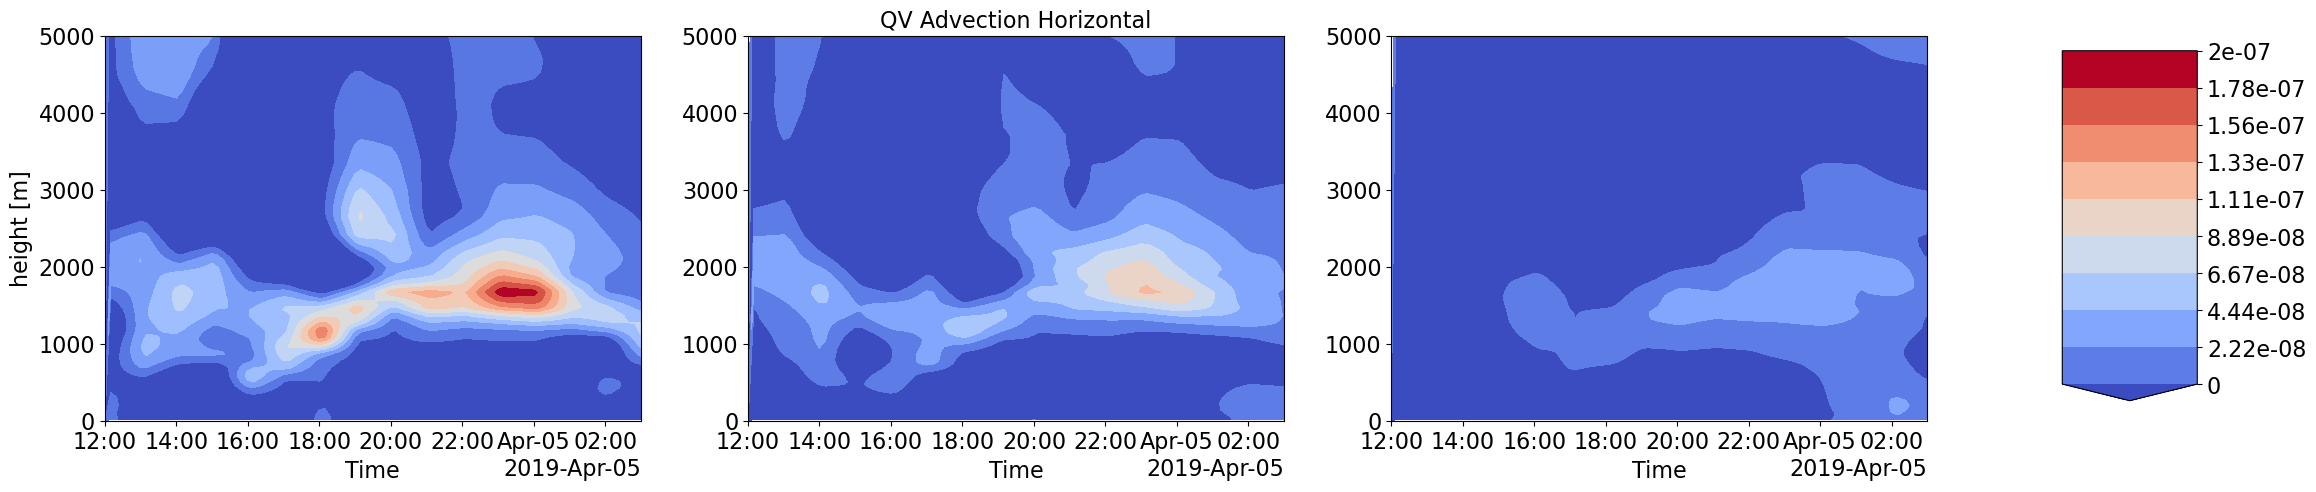

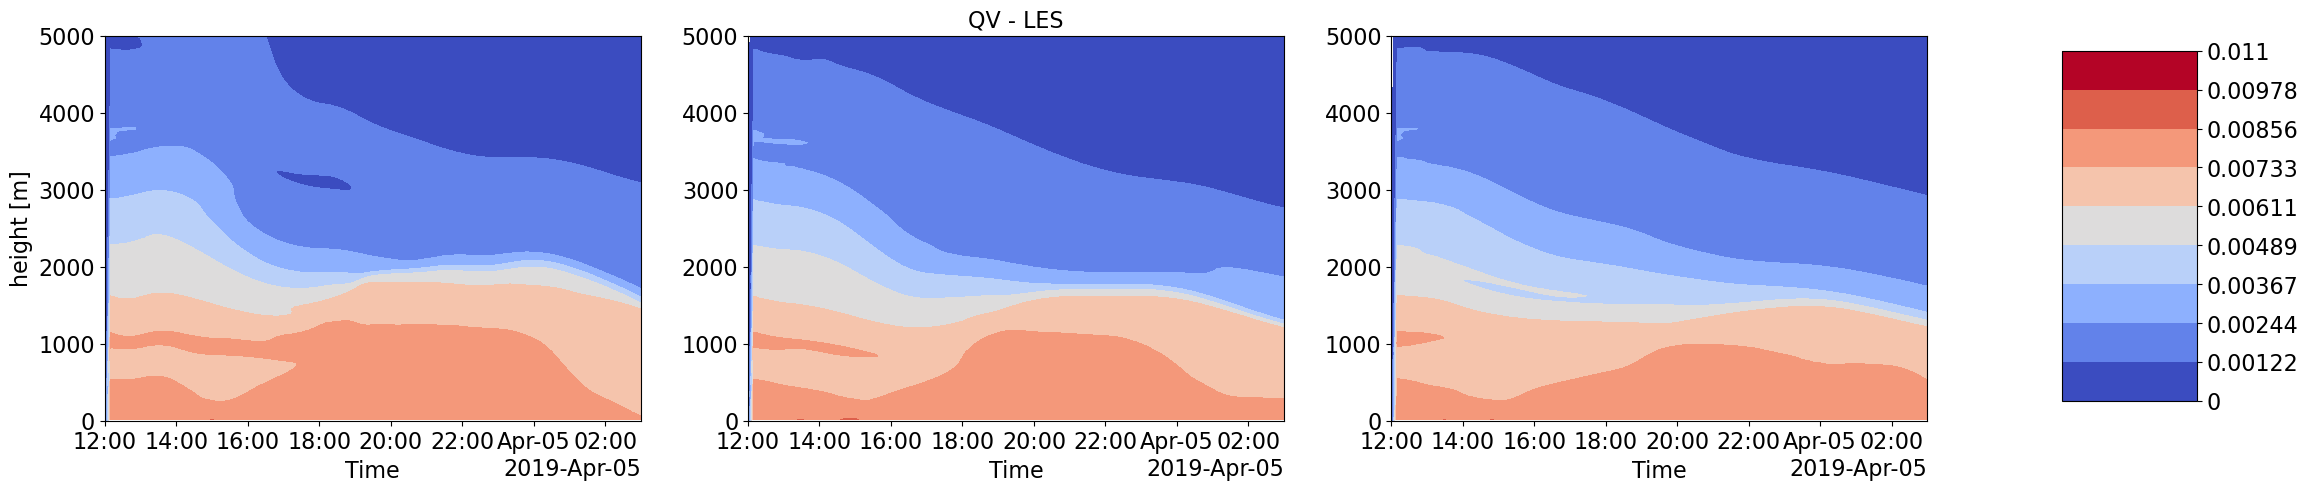

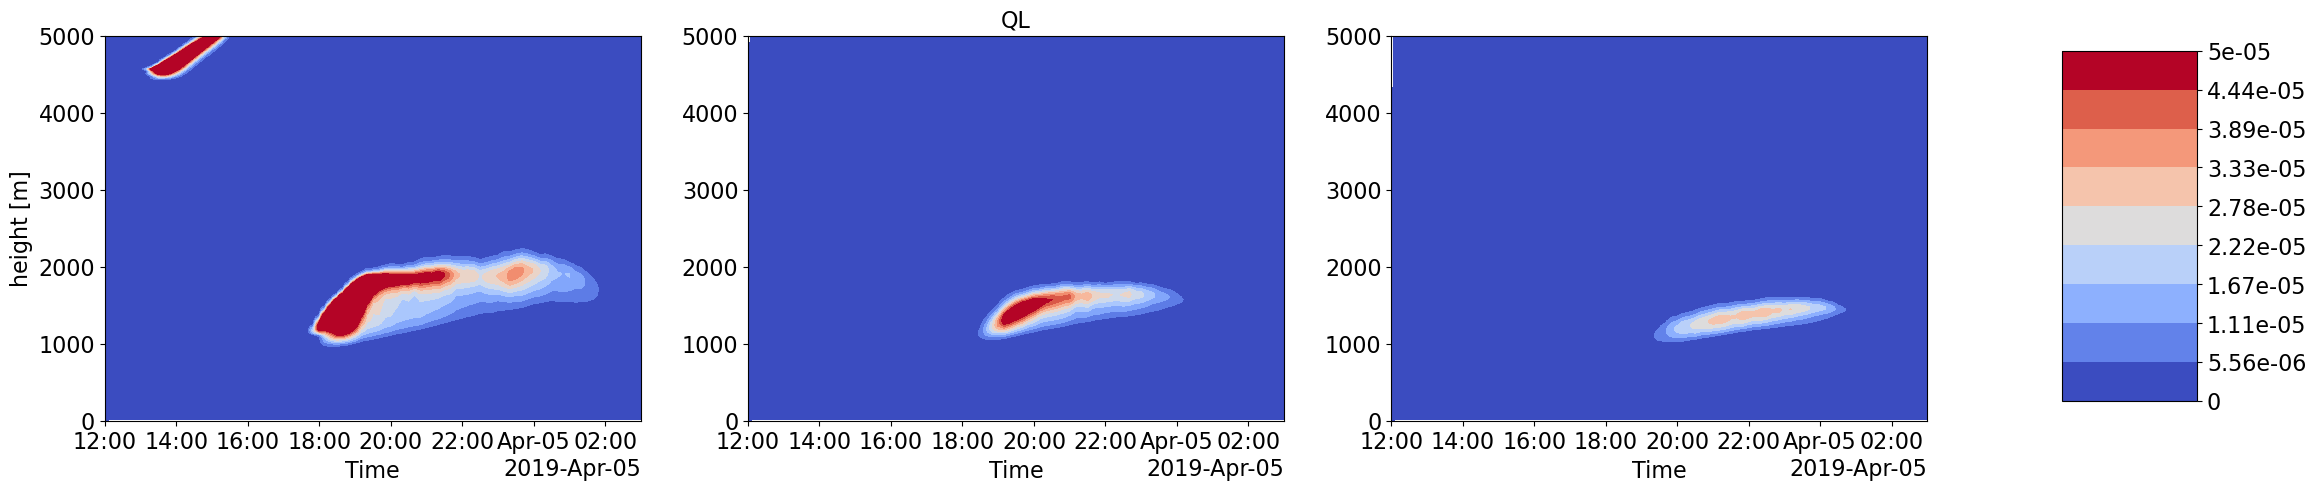

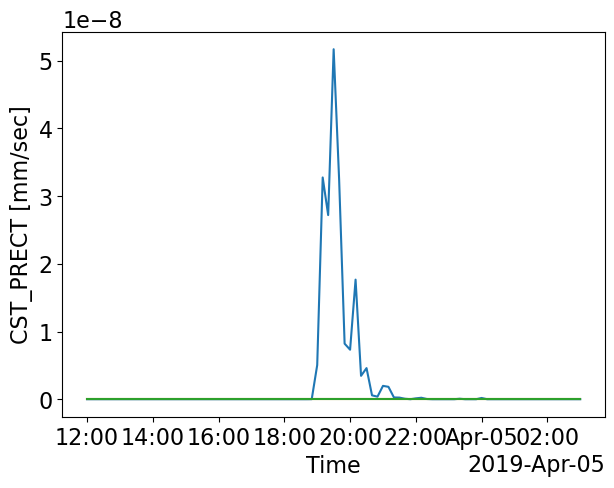

In [110]:
import numpy as np
import matplotlib.ticker as tkr

pl.rcParams['xtick.labelsize'] = 16
pl.rcParams['ytick.labelsize'] = 16
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 16

def plot_contour(var_name,label_name,min_level,max_level):
    fig,ax = pl.subplots(1,3,figsize=(27,5))
    pl.subplot(131)
    ds_stat_1[var_name].plot.contourf(x='Time',y='height',levels=np.linspace(min_level,max_level,10),add_colorbar=False,cmap='coolwarm')
    pl.ylim([0,5000])
    pl.title(label_name[0])
    pl.subplot(132)
    ds_stat_2[var_name].plot.contourf(x='Time',y='height',levels=np.linspace(min_level,max_level,10),add_colorbar=False,cmap='coolwarm')
    pl.title(label_name[1])
    pl.ylabel('')
    pl.ylim([0,5000])
    pl.subplot(133)
    p1=ds_stat_3[var_name].plot.contourf(x='Time',y='height',levels=np.linspace(min_level,max_level,10),add_colorbar=False,cmap='coolwarm')
    pl.ylabel('')
    pl.ylim([0,5000])
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cb2 = fig.colorbar(p1,format=tkr.FormatStrFormatter('%.3g'),cax=cbar_ax)
    pl.title(label_name[2])
    
plot_contour('CSP_THDT_LSHOR',['','TH Advection Horizontal',''],-1e-4,1e-4)
plot_contour('CSP_TH',['','TH - LES',''],280,310)
plot_contour('CSP_QVDT_LSHOR',['','QV Advection Horizontal',''],0,2e-7)
plot_contour('CSP_QV',['','QV - LES',''],0,0.011)
plot_contour('CSP_QL',['','QL',''],0,5e-5)

pl.figure(figsize=(7,5))
ds_stat_1['CST_PRECT'].plot.line(label='75 km')
ds_stat_2['CST_PRECT'].plot.line(label='150 km')
ds_stat_2['CST_PRECT'].plot.line(label='300 km')

Which of the forcing scales produces clouds close to what was observed from satellie images (GOES)?

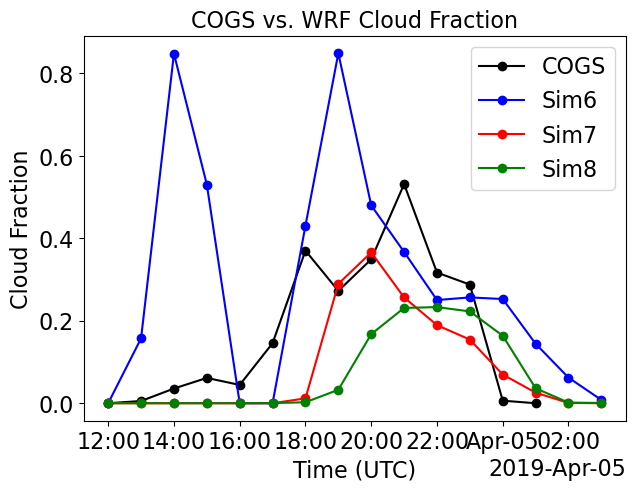

In [112]:
sim_id=6
ds_cogs_1 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id:04d}/obs_model/sgplassocogsdiagobsmod{sim_id}C1.m1.{case_date:%Y%m%d}.120000.nc")
sim_id=7
ds_cogs_2 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id:04d}/obs_model/sgplassocogsdiagobsmod{sim_id}C1.m1.{case_date:%Y%m%d}.120000.nc")
sim_id=8
ds_cogs_3 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id:04d}/obs_model/sgplassocogsdiagobsmod{sim_id}C1.m1.{case_date:%Y%m%d}.120000.nc")

fig, ax = plt.subplots(ncols=1,figsize=(7,5))
ds_cogs_1["low_cloud_fraction_cogs"].isel(source_type=0).plot(ax=ax, marker="o", label="COGS",color='k')
ds_cogs_1["low_cloud_fraction_cogs"].isel(source_type=1).plot(ax=ax, marker="o", label="Sim6", color='b')
ds_cogs_2["low_cloud_fraction_cogs"].isel(source_type=1).plot(ax=ax, marker="o", label="Sim7", color= 'r')
ds_cogs_3["low_cloud_fraction_cogs"].isel(source_type=1).plot(ax=ax, marker="o", label="Sim8", color = 'g')
# If you plan to share with frieds, do a little clean-up beyond the default labelling from xarray...
ax.legend()
ax.set_title("COGS vs. WRF Cloud Fraction")
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Cloud Fraction")
plt.show()

How does Cloud Organization and width of maximum cloud cell changes between the three cases? 

In [66]:
#### Field Plots #####
import os
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm
import math
from scipy.stats import norm
import xarray as xr
import netCDF4 as nc
import sys

sys.setrecursionlimit(1000000)

##########################################################################################
class cell:
    def __init__(self, id):
        self.id = id
        self.value = [[],[]]
        self.location = [[],[]]
        self.nelements = 0
        self.nelements_local = 0

    def add_elements(self, i, j, var_values):
        self.location[0].append(i)
        self.location[1].append(j)
        self.value[0].append(var_values)
        self.nelements = self.nelements + 1
        self.nelements_local = self.nelements_local + 1
    def __del__(self):
        return
##########################################################################################
def find_boolean(variable, threshold_criteria): #variable is f(i, j, t): --> outputs boolean -1 (unsatisfied) 0 (satisfied) 
    boolean = np.zeros(( len(variable[:,0]), len(variable[0,:])))
    boolean = -1
    boolean = np.where(variable[:,:]>threshold_criteria,0,-1)
    return boolean;
########################################################################################
def identify_elements_in_cell(i,j,new_cell):  #input the ijk at which boolean is satisfied along with boolean and new cell created 

    global booli;
    new_cell.add_elements(i,j,cell_variable[i,j])
    booli[i,j] = -1

    ii=i-1; jj=j; #look west
    if ii<0:
       ii = nx-1
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i+1; jj=j;  #look east
    if ii>nx-1:
       ii = 0
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i; jj=j+1;  #look north
    if jj>ny-1:
        jj = 0
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i; jj=j-1;  #look south
    if jj<0:
       jj = ny-1
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell) 
#################################################################################################
def create_new_cell(variable,bool):                                # input the boolean and the variable, output is the cells tracked (i,j,t) based on boolean 
    cell_number = 0;
    global booli,cell_variable,nx,ny;
    nx = len(variable[:,0])
    ny = len(variable[0,:])
    booli=bool;cell_variable = variable;
    variable_cells = []
    for j in range(0,ny):
        for i in range(0,nx):
            if booli[i,j]==0: 
                new_cell=cell(cell_number) 
                identify_elements_in_cell(i,j,new_cell)
                if new_cell.nelements>=nminelems:
                    variable_cells.append(new_cell)
                    variable_cells[cell_number].id = cell_number
                    cell_number = cell_number + 1
                else:
                    del new_cell;
    return variable_cells, cell_number;
#################################################################################################
def run_tracking(tracked_variable,param_threshold):
    global nx,ny;
    nx = len(tracked_variable[:,0]); ny = len(tracked_variable[0,:]); 
    bool = find_boolean(tracked_variable,param_threshold)
    [cells,cell_number] = create_new_cell(tracked_variable,bool);
    return cells,cell_number;
####################################################################################################
def find_cell_centers(cells,ncells):
    centers=np.zeros((ncells,2))
    max_cloudsize=0;
    for i in range(0,ncells):
        centers[i,0]=np.mean(cells[i].location[0])
        centers[i,1]=np.mean(cells[i].location[1])
        if cells[i].nelements>max_cloudsize:
            max_cloudsize=cells[i].nelements
    return centers,max_cloudsize;
####################################################################################################
def find_nearest_neighbor(centers,nx,ny):
    distance=np.zeros(len(centers[:,0]))
    nn_distance=np.zeros(len(centers[:,0]))
    for i in range(len(centers[:,0])):
        for j in range(len(centers[:,0])):
            if i==j:
                distance[j]=100;
            else:
                xdist=min(abs(centers[i,0]+nx-centers[j,0]),abs(centers[i,0]-nx-centers[j,0]),abs(centers[i,0]-centers[j,0]))
                ydist=min(abs(centers[i,1]+ny-centers[j,1]),abs(centers[i,1]-ny-centers[j,1]),abs(centers[i,1]-centers[j,1]))
                distance[j]=math.sqrt(xdist**2+ydist**2)
        nn_distance[i]=min(distance)
    return nn_distance;
####################################################################################################
def retrieve_variable(variable_name,netcdf_path): #open corresponding netcdf file and read data
    all_data=xr.open_dataset(netcdf_path,decode_times=False)
    var=all_data[variable_name].values
    variable=var
    x=all_data['x'].values
    y=all_data['y'].values
    t=all_data['Time'].values
    return variable, x, y, t;    
##########################################################################################
#[w_cross,x,y,t]=retrieve_variable(variable_name='w',netcdf_path='/fs/ess/PFS0220/eurec4a/case_1060lagtraj_feb2_withw/w_cross.nc')
def get_iorg(xr_data,variable_name,param_threshold,start_ind,slice_len):
    variable=xr_data[variable_name].values
    i_org=np.zeros(xr_data.Time.size)
    Max_Clouds=np.zeros(xr_data.Time.size)
    for i in range(start_ind,xr_data.Time.size,slice_len):
        if i%60==0:
            print(i)
        [clouds,ncells]=run_tracking(tracked_variable=variable[i,:,:],param_threshold=param_threshold)
        if ncells<2:
            i_org[i]=0;
            Max_Clouds[i]=0;
        else:
            [centers,Max_Clouds[i]]=find_cell_centers(clouds,ncells)
            nn_distance=find_nearest_neighbor(centers,nx,ny)
            centers=centers.astype(int)
            nn_sorted = np.sort(nn_distance);nn_sorted=nn_sorted/max(nn_sorted)
            p = 1. * np.arange(len(nn_distance)) / (len(nn_distance) - 1)
            p_ran=1-np.exp(-1*(math.pi)*nn_sorted*nn_sorted)
            i_org[i]=np.trapz(p,x=p_ran)
    xr_data['i_org']=xr.DataArray(i_org,dims=['Time'])
    xr_data['Max_Clouds']=xr.DataArray(Max_Clouds,dims=['Time'])
    return xr_data;
#########################################################################################


nminelems=10
slice_len=1;

ds_xwrf_1=get_iorg(ds_xwrf_1,'qc_path',0.005,start_ind=0,slice_len=slice_len)
ds_xwrf_2=get_iorg(ds_xwrf_2,'qc_path',0.005,start_ind=0,slice_len=slice_len)
ds_xwrf_3=get_iorg(ds_xwrf_3,'qc_path',0.005,start_ind=0,slice_len=slice_len)

0
60
0
60
0
60


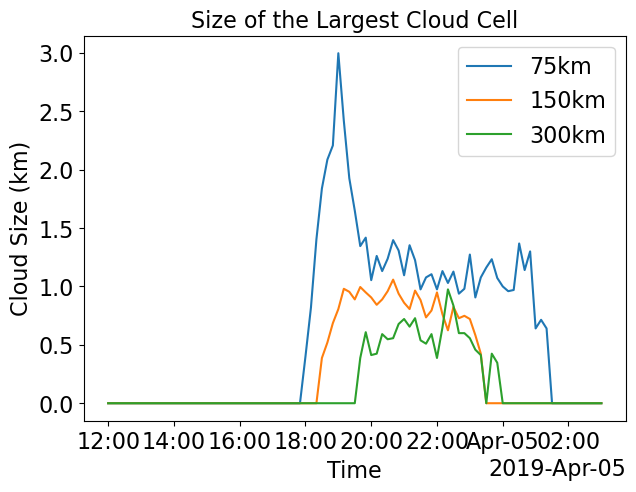

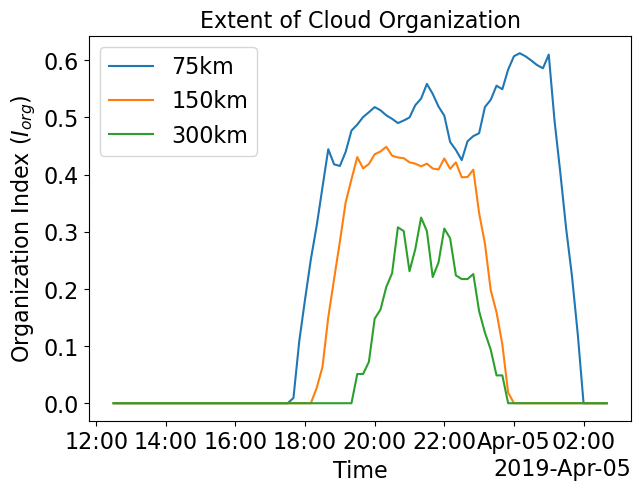

In [124]:
pl.figure(figsize=(7,5))
(0.1*ds_xwrf_1['Max_Clouds']**(1/2)).plot.line(label='75km')
(0.1*ds_xwrf_2['Max_Clouds']**(1/2)).plot.line(label='150km')
(0.1*ds_xwrf_3['Max_Clouds']**(1/2)).plot.line(label='300km')
pl.ylabel('Cloud Size (km)')
pl.title('Size of the Largest Cloud Cell')
pl.legend()

pl.figure(figsize=(7,5))
ds_xwrf_1.i_org.rolling(Time=6, center=True).mean().dropna("Time").plot.line(label='75km')
ds_xwrf_2.i_org.rolling(Time=6, center=True).mean().dropna("Time").plot.line(label='150km')
ds_xwrf_3.i_org.rolling(Time=6, center=True).mean().dropna("Time").plot.line(label='300km')
pl.ylabel(r'Organization Index ($I_{org}$)')
pl.title('Extent of Cloud Organization')
pl.legend()






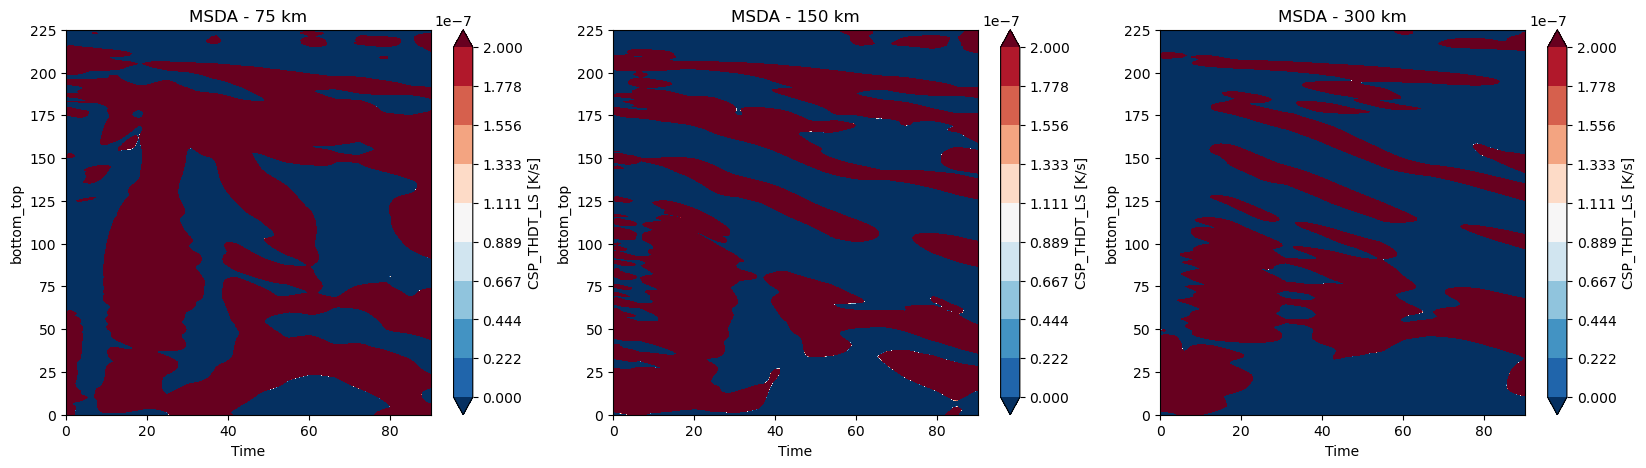

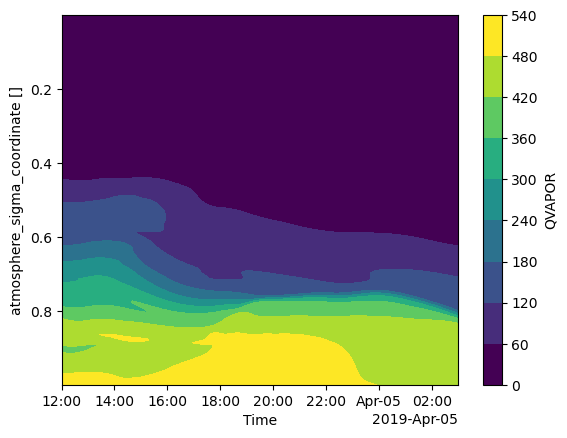

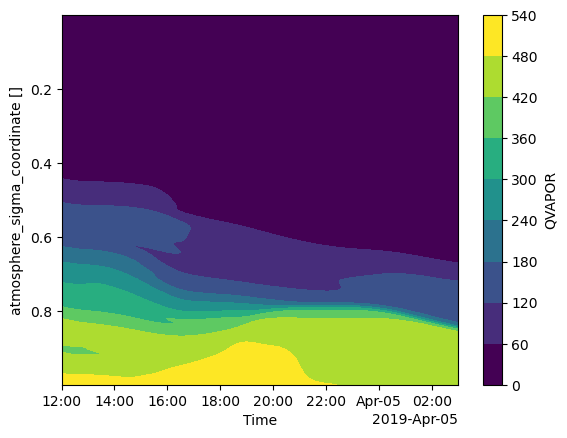

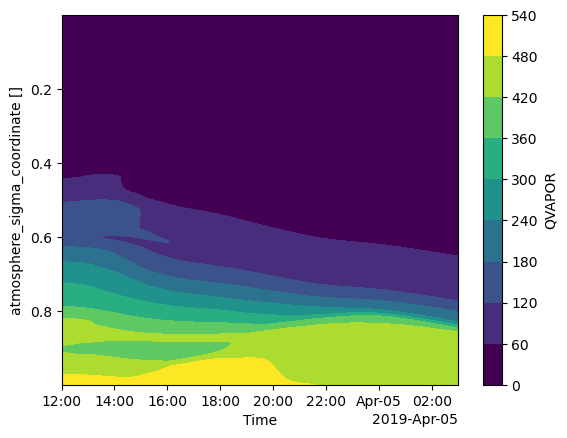

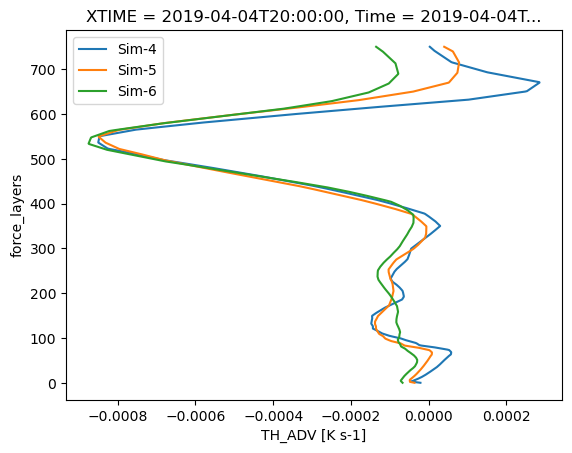

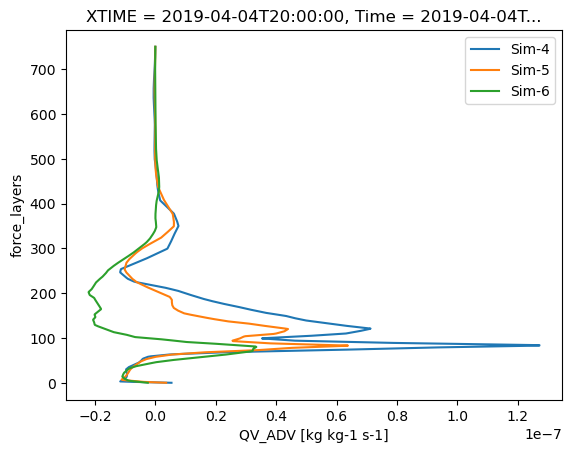

In [9]:





pl.figure()
ds_xwrf_1.QVAPOR.sum(dim=['x','y']).plot.contourf(x='Time',levels=10)
pl.gca().invert_yaxis()



pl.figure()
ds_xwrf_2.QVAPOR.sum(dim=['x','y']).plot.contourf(x='Time',levels=10)
pl.gca().invert_yaxis()

pl.figure()
ds_xwrf_3.QVAPOR.sum(dim=['x','y']).plot.contourf(x='Time',levels=10)
pl.gca().invert_yaxis()

pl.figure()
ds_xwrf_1.TH_ADV.isel(Time=8*6).plot.line(label='Sim-4',y='force_layers')
ds_xwrf_2.TH_ADV.isel(Time=8*6).plot.line(label='Sim-5',y='force_layers')
ds_xwrf_3.TH_ADV.isel(Time=8*6).plot.line(label='Sim-6',y='force_layers')
pl.legend()

pl.figure()
ds_xwrf_1.QV_ADV.isel(Time=8*6).plot.line(label='Sim-4',y='force_layers')
ds_xwrf_2.QV_ADV.isel(Time=8*6).plot.line(label='Sim-5',y='force_layers')
ds_xwrf_3.QV_ADV.isel(Time=8*6).plot.line(label='Sim-6',y='force_layers')
pl.legend()